In [23]:
file_prefix <- "ch09.2"
reuse_fit <- T
source("preset.R")

input_file <- "data/BattingAverage.csv"

# data

In [3]:
data <- read_csv("data/BattingAverage.csv") %>% 
  mutate(pos = as.integer(factor(PriPos)))
stan_data <- list(
  NT = nrow(data), 
  NG = n_distinct(data$pos), 
  Z = data$Hits, 
  N = data$AtBats, 
  G = data$pos
)

Parsed with column specification:
cols(
  Player = col_character(),
  PriPos = col_character(),
  Hits = col_double(),
  AtBats = col_double(),
  PlayerNumber = col_double(),
  PriPosNumber = col_double()
)



# fit

In [4]:
fit <- stan(file = "model/ch09.2.stan", data = stan_data, seed = 123, 
                chains = 4, warmup = 500, iter = 10000, thin = 2)

Warning message:
“There were 39 transitions after warmup that exceeded the maximum treedepth. Increase max_treedepth above 10. See
http://mc-stan.org/misc/warnings.html#maximum-treedepth-exceeded”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”


In [7]:
#save(fit, file = save_file_name("fit"))
#load(file = save_file_name("fit"))

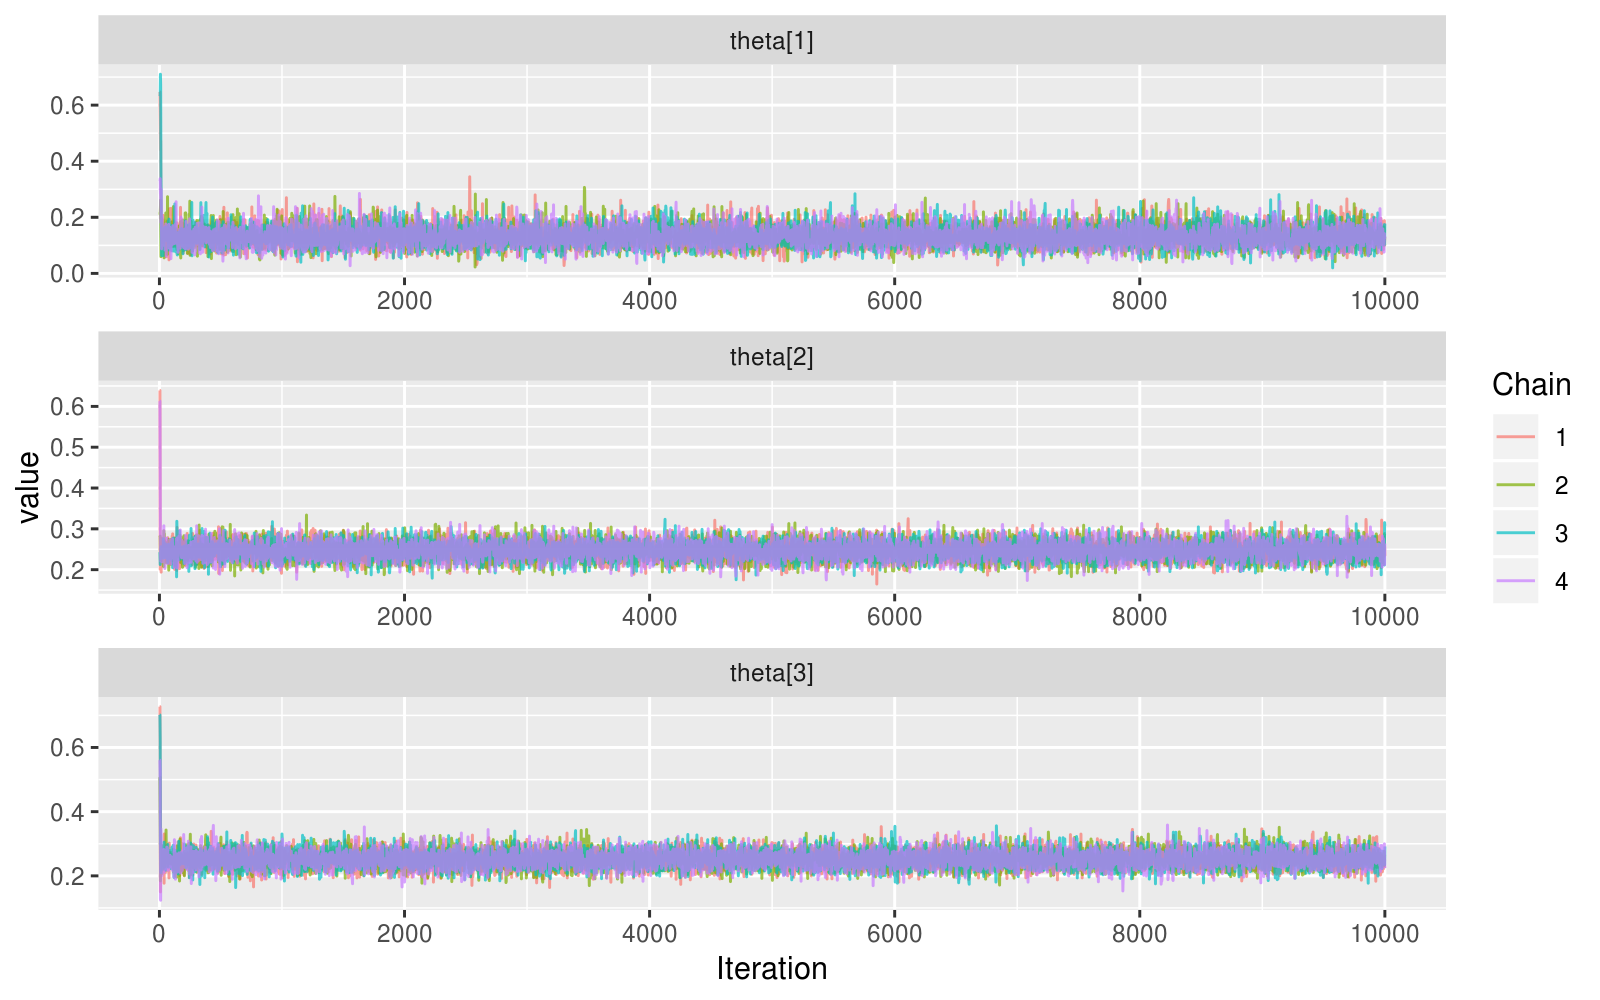

In [9]:
set_plot_size(8, 5)
ggs_traceplot(ggs(fit, inc_warmup = T), family = "theta\\[[123]\\]")
#ggmcmc(ggs(fit), file = plot_file_name("diag"))  ## too big

# result

In [10]:
NUM_POS <- max(data$pos)
res <- fit_to_tibble(fit)
id_to_mle <- function(idx) data$Hits[[idx]] / data$AtBats[[idx]]
pos_map <- data %>% select(PriPos, pos) %>% distinct()
id_to_pos <- function(id) filter(pos_map, pos == id)$PriPos

In [11]:
players <- data %>% 
  transmute(
    id = 1:n(), 
    ba_mle = Hits / AtBats, 
    Player
  )
positions <- data %>% 
  group_by(pos) %>% 
  summarise(pos_name = first(PriPos), ba_mle = sum(Hits) / sum(AtBats))

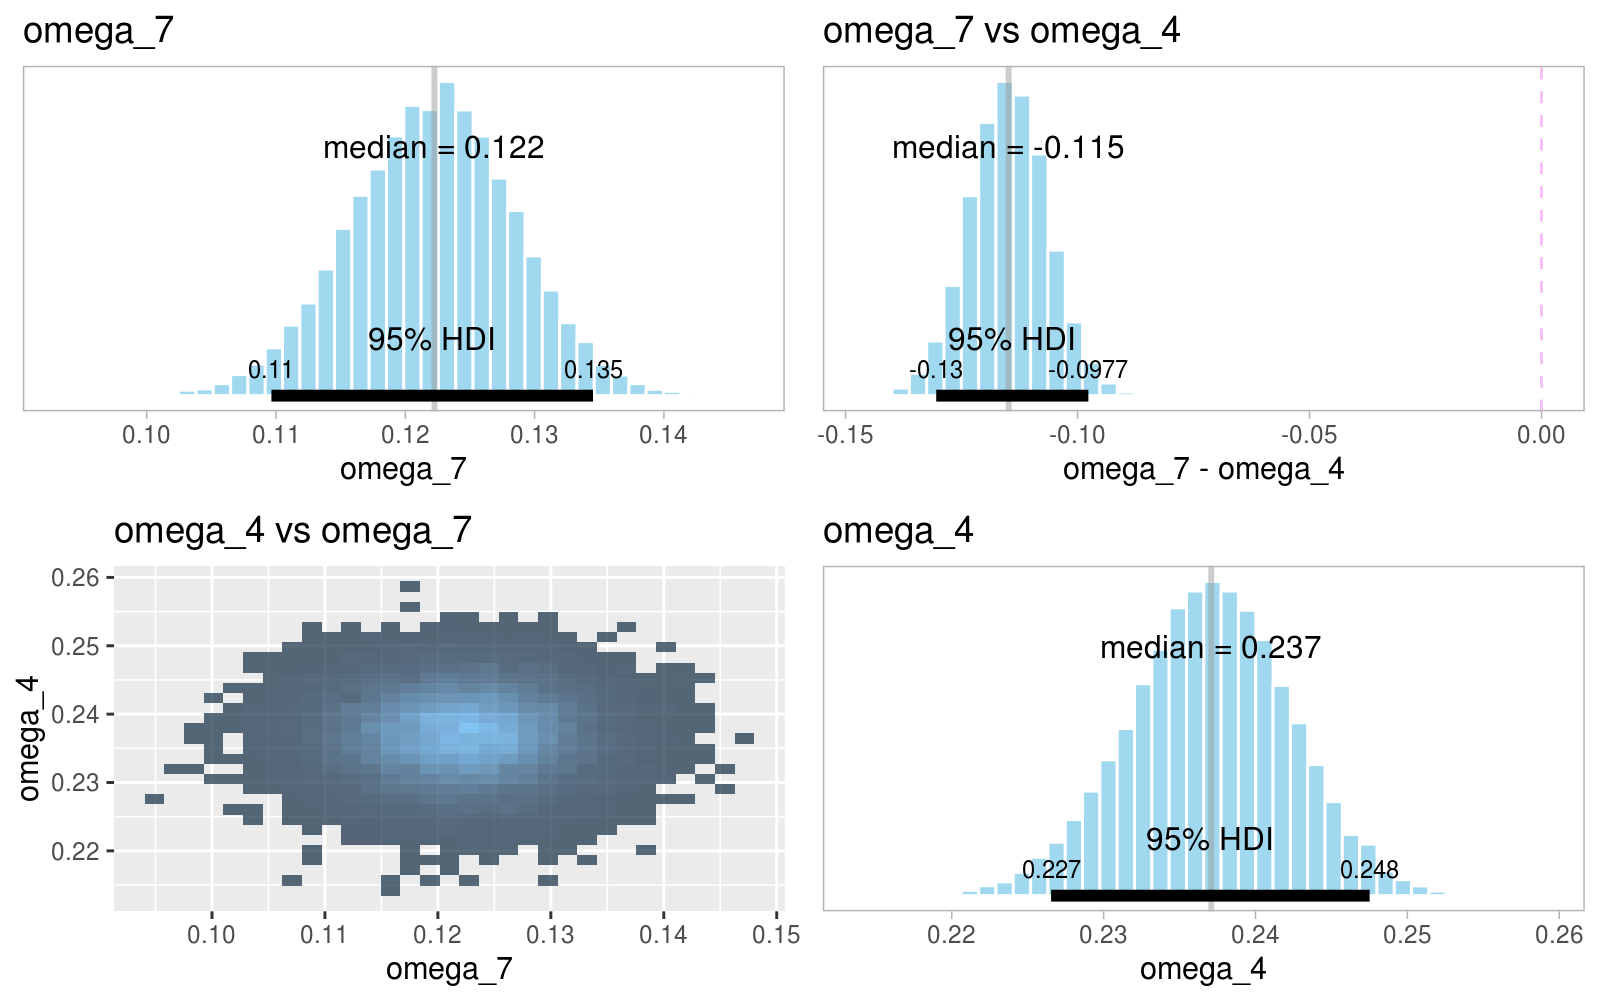

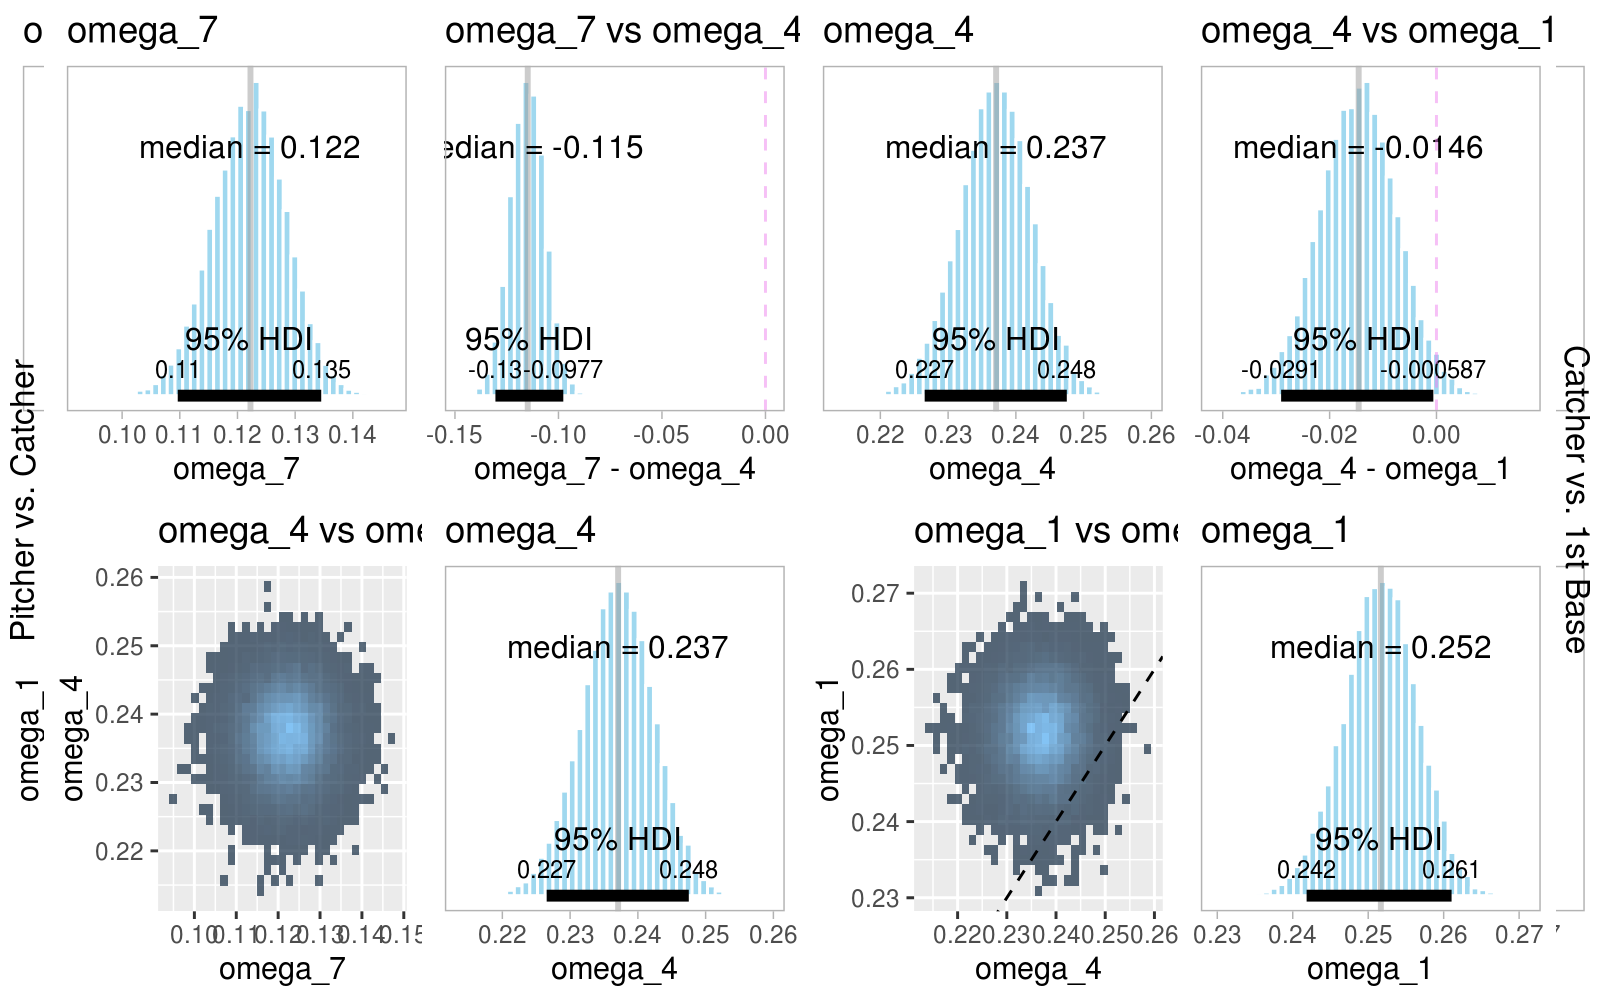

In [12]:
# picher vs catcher
# figure9.14
grid.arrange(
  plot_post_pair_diff(res, c(7, 4), "omega"), 
  plot_post_pair_diff(res, c(4, 1), "omega"), 
  ncol = 2, 
  left = "Pitcher vs. Catcher", right = "Catcher vs. 1st Base"
)

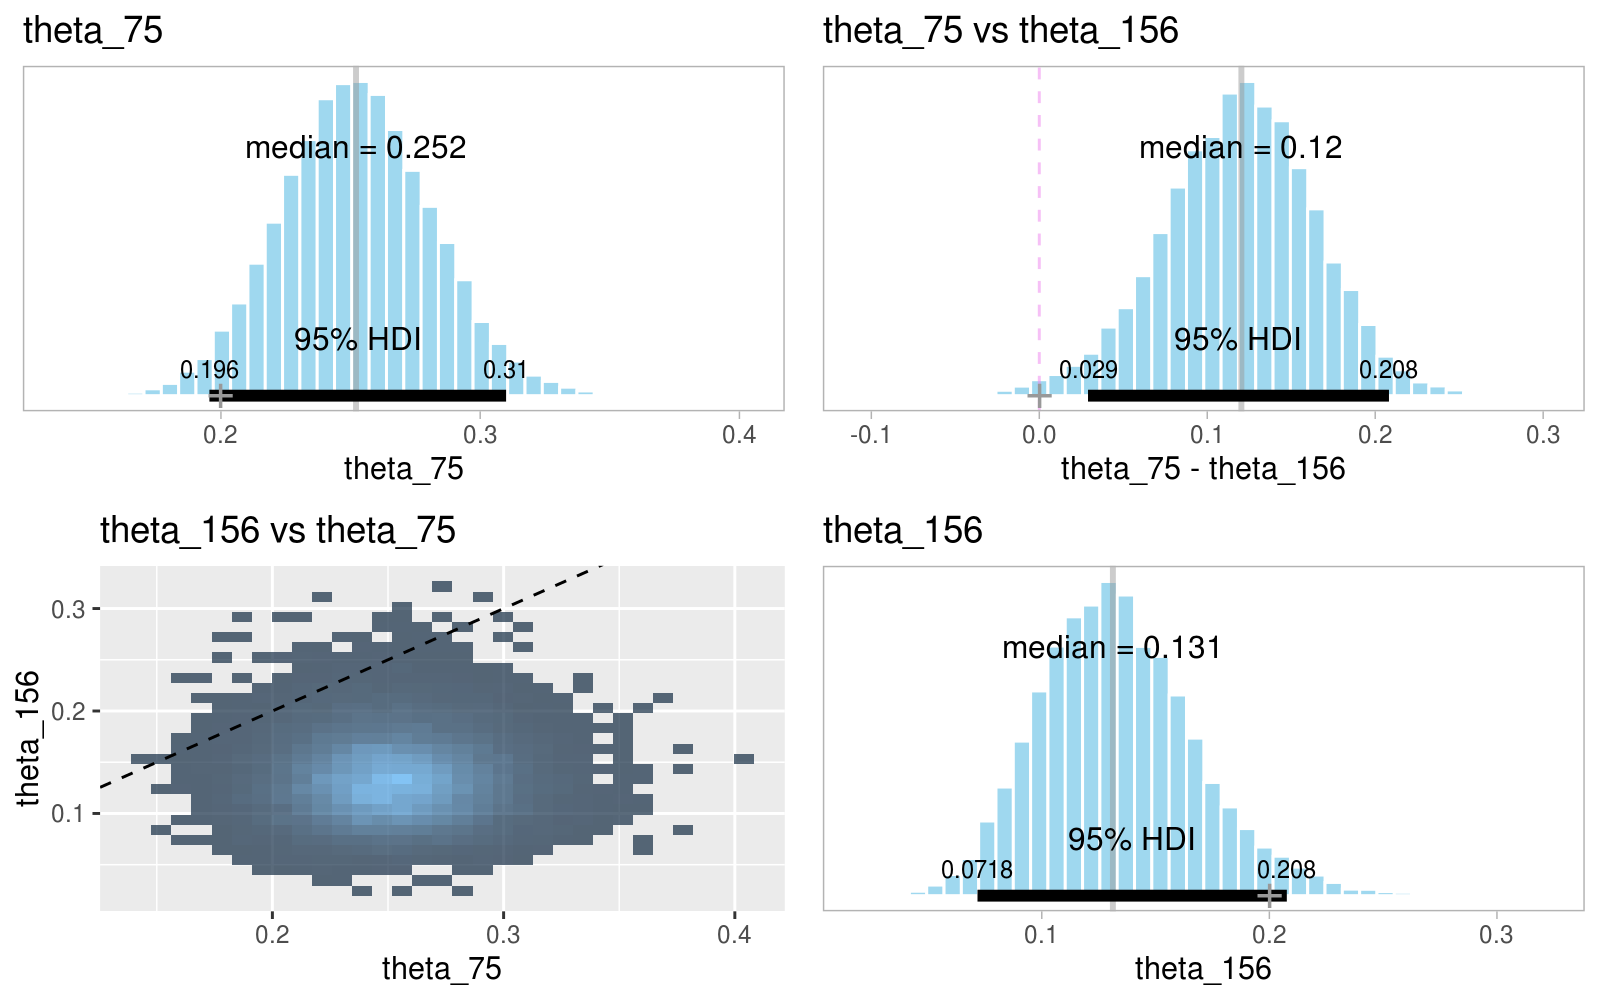

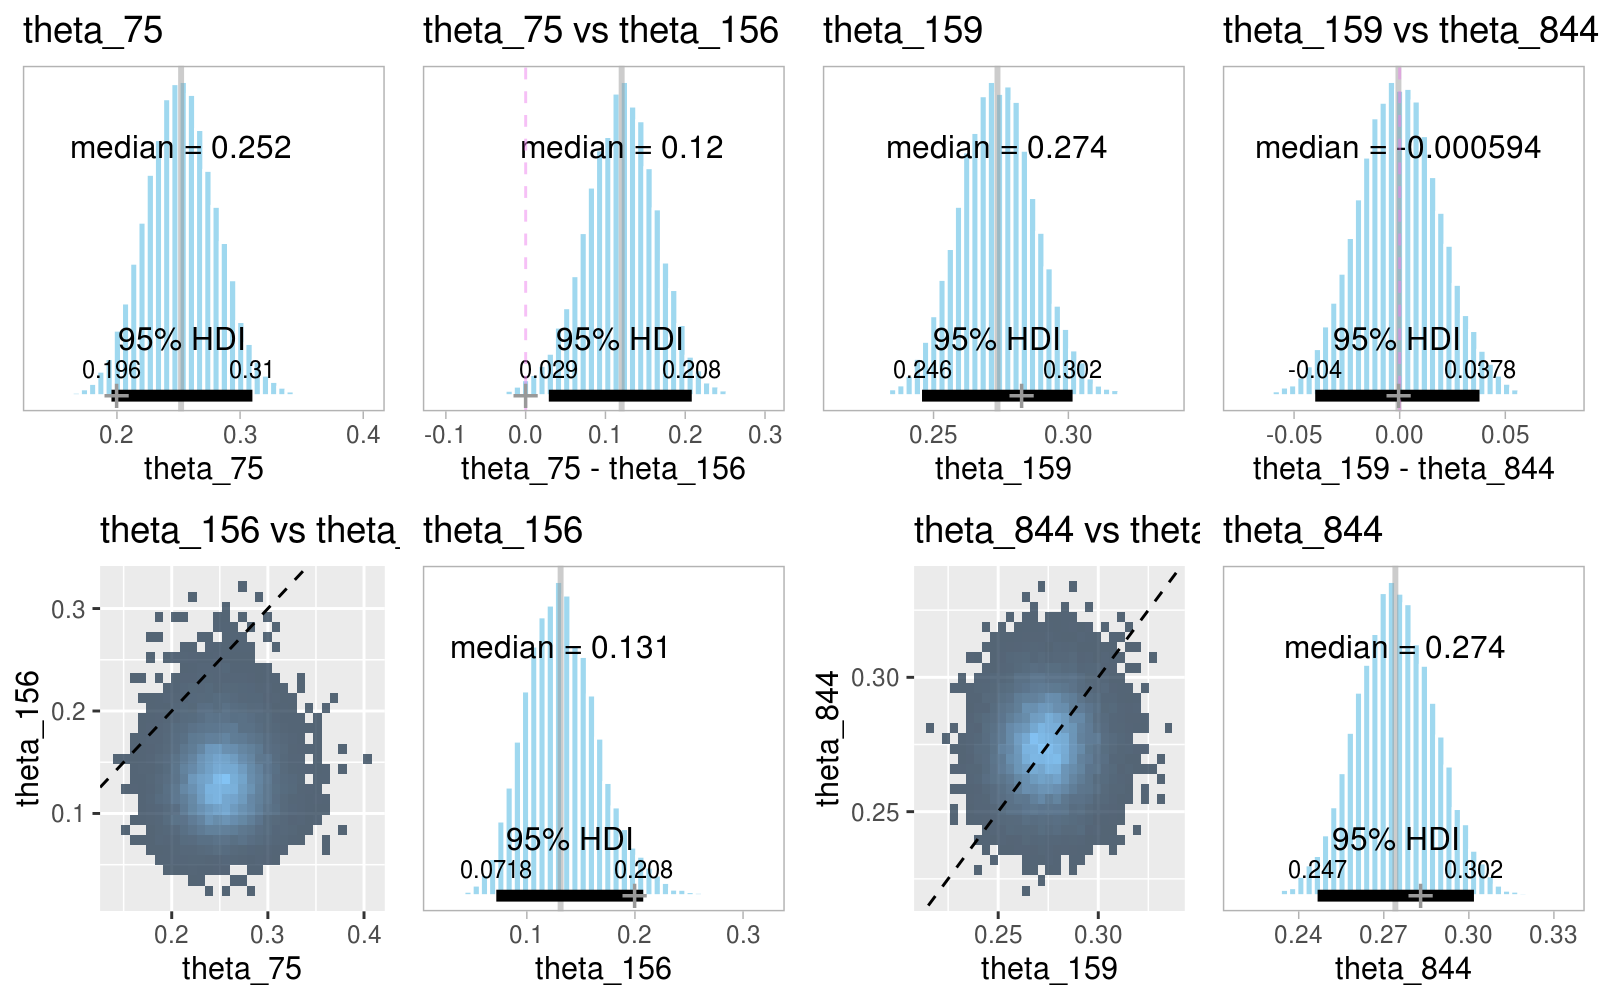

In [13]:
# skip displaying player name, position and N, z (tiresome)
# figure9.15
grid.arrange(
  plot_post_pair_diff(res, c(75, 156), "theta",  mle_func = id_to_mle), 
  plot_post_pair_diff(res, c(159, 844), "theta", mle_func = id_to_mle), 
  ncol = 2
)

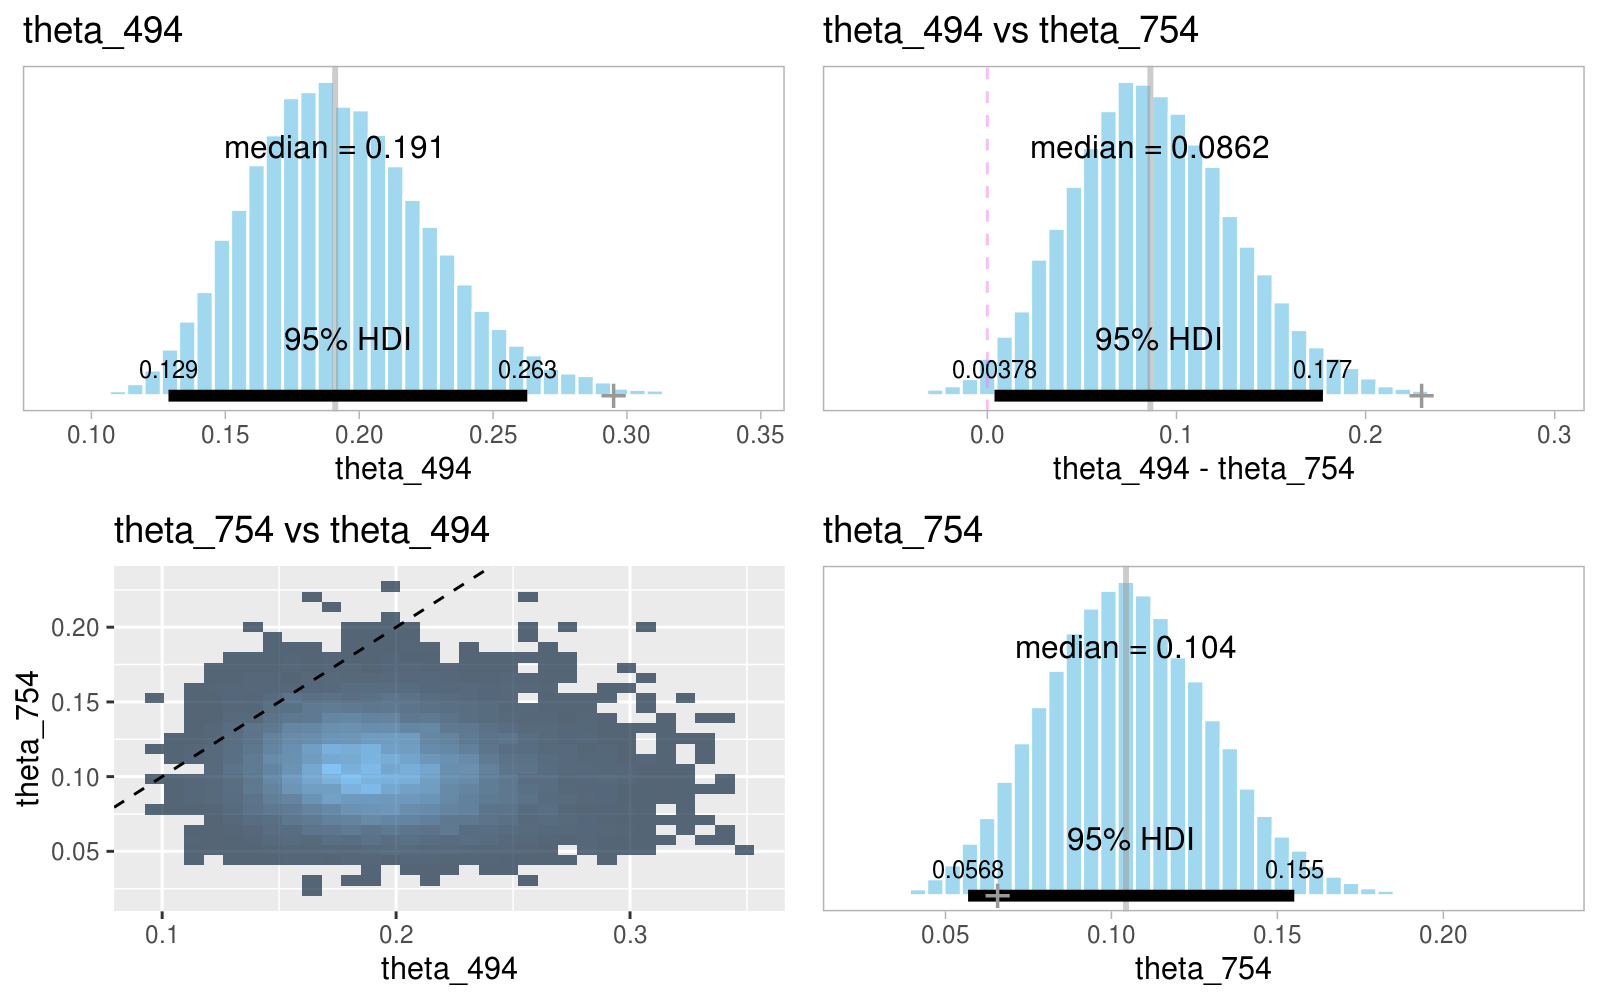

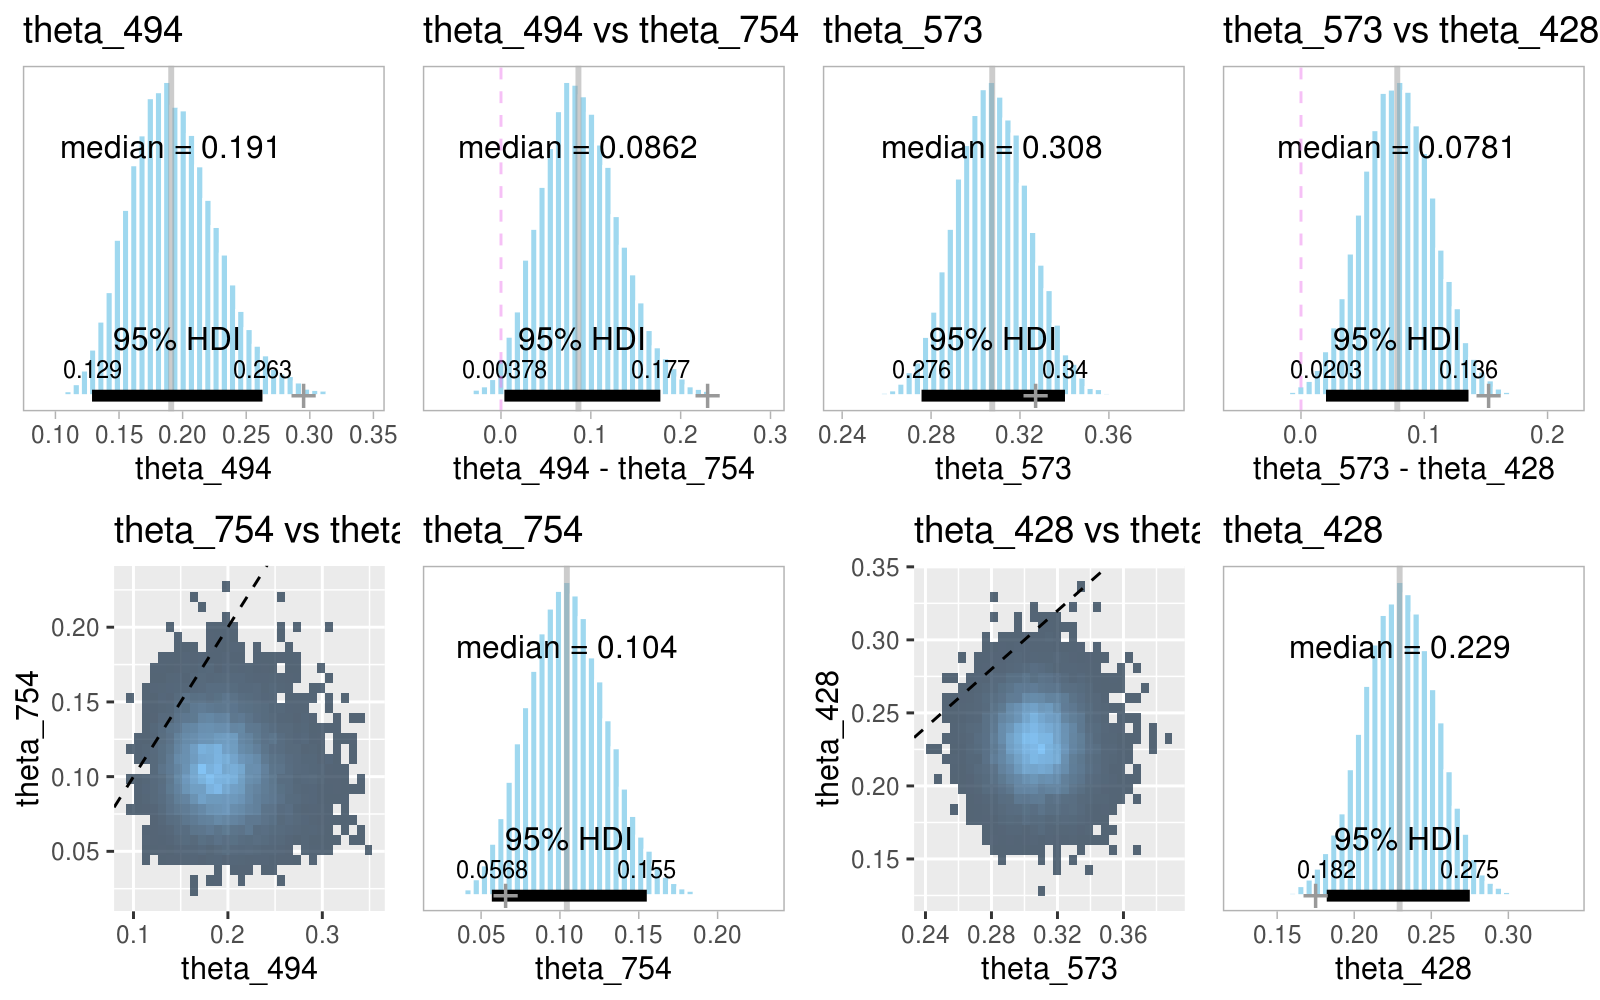

In [15]:
# figure9.16
grid.arrange(
  plot_post_pair_diff(res, c(494, 754), "theta", mle_func = id_to_mle), 
  plot_post_pair_diff(res, c(573, 428), "theta", mle_func = id_to_mle), 
  ncol = 2
)

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1 rows containing non-finite values (stat_hdi).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 45 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 45 rows containing non-finite values (stat_hdi).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 99 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 99 rows containing non-finite values (stat_hdi).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 580 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 580 rows co

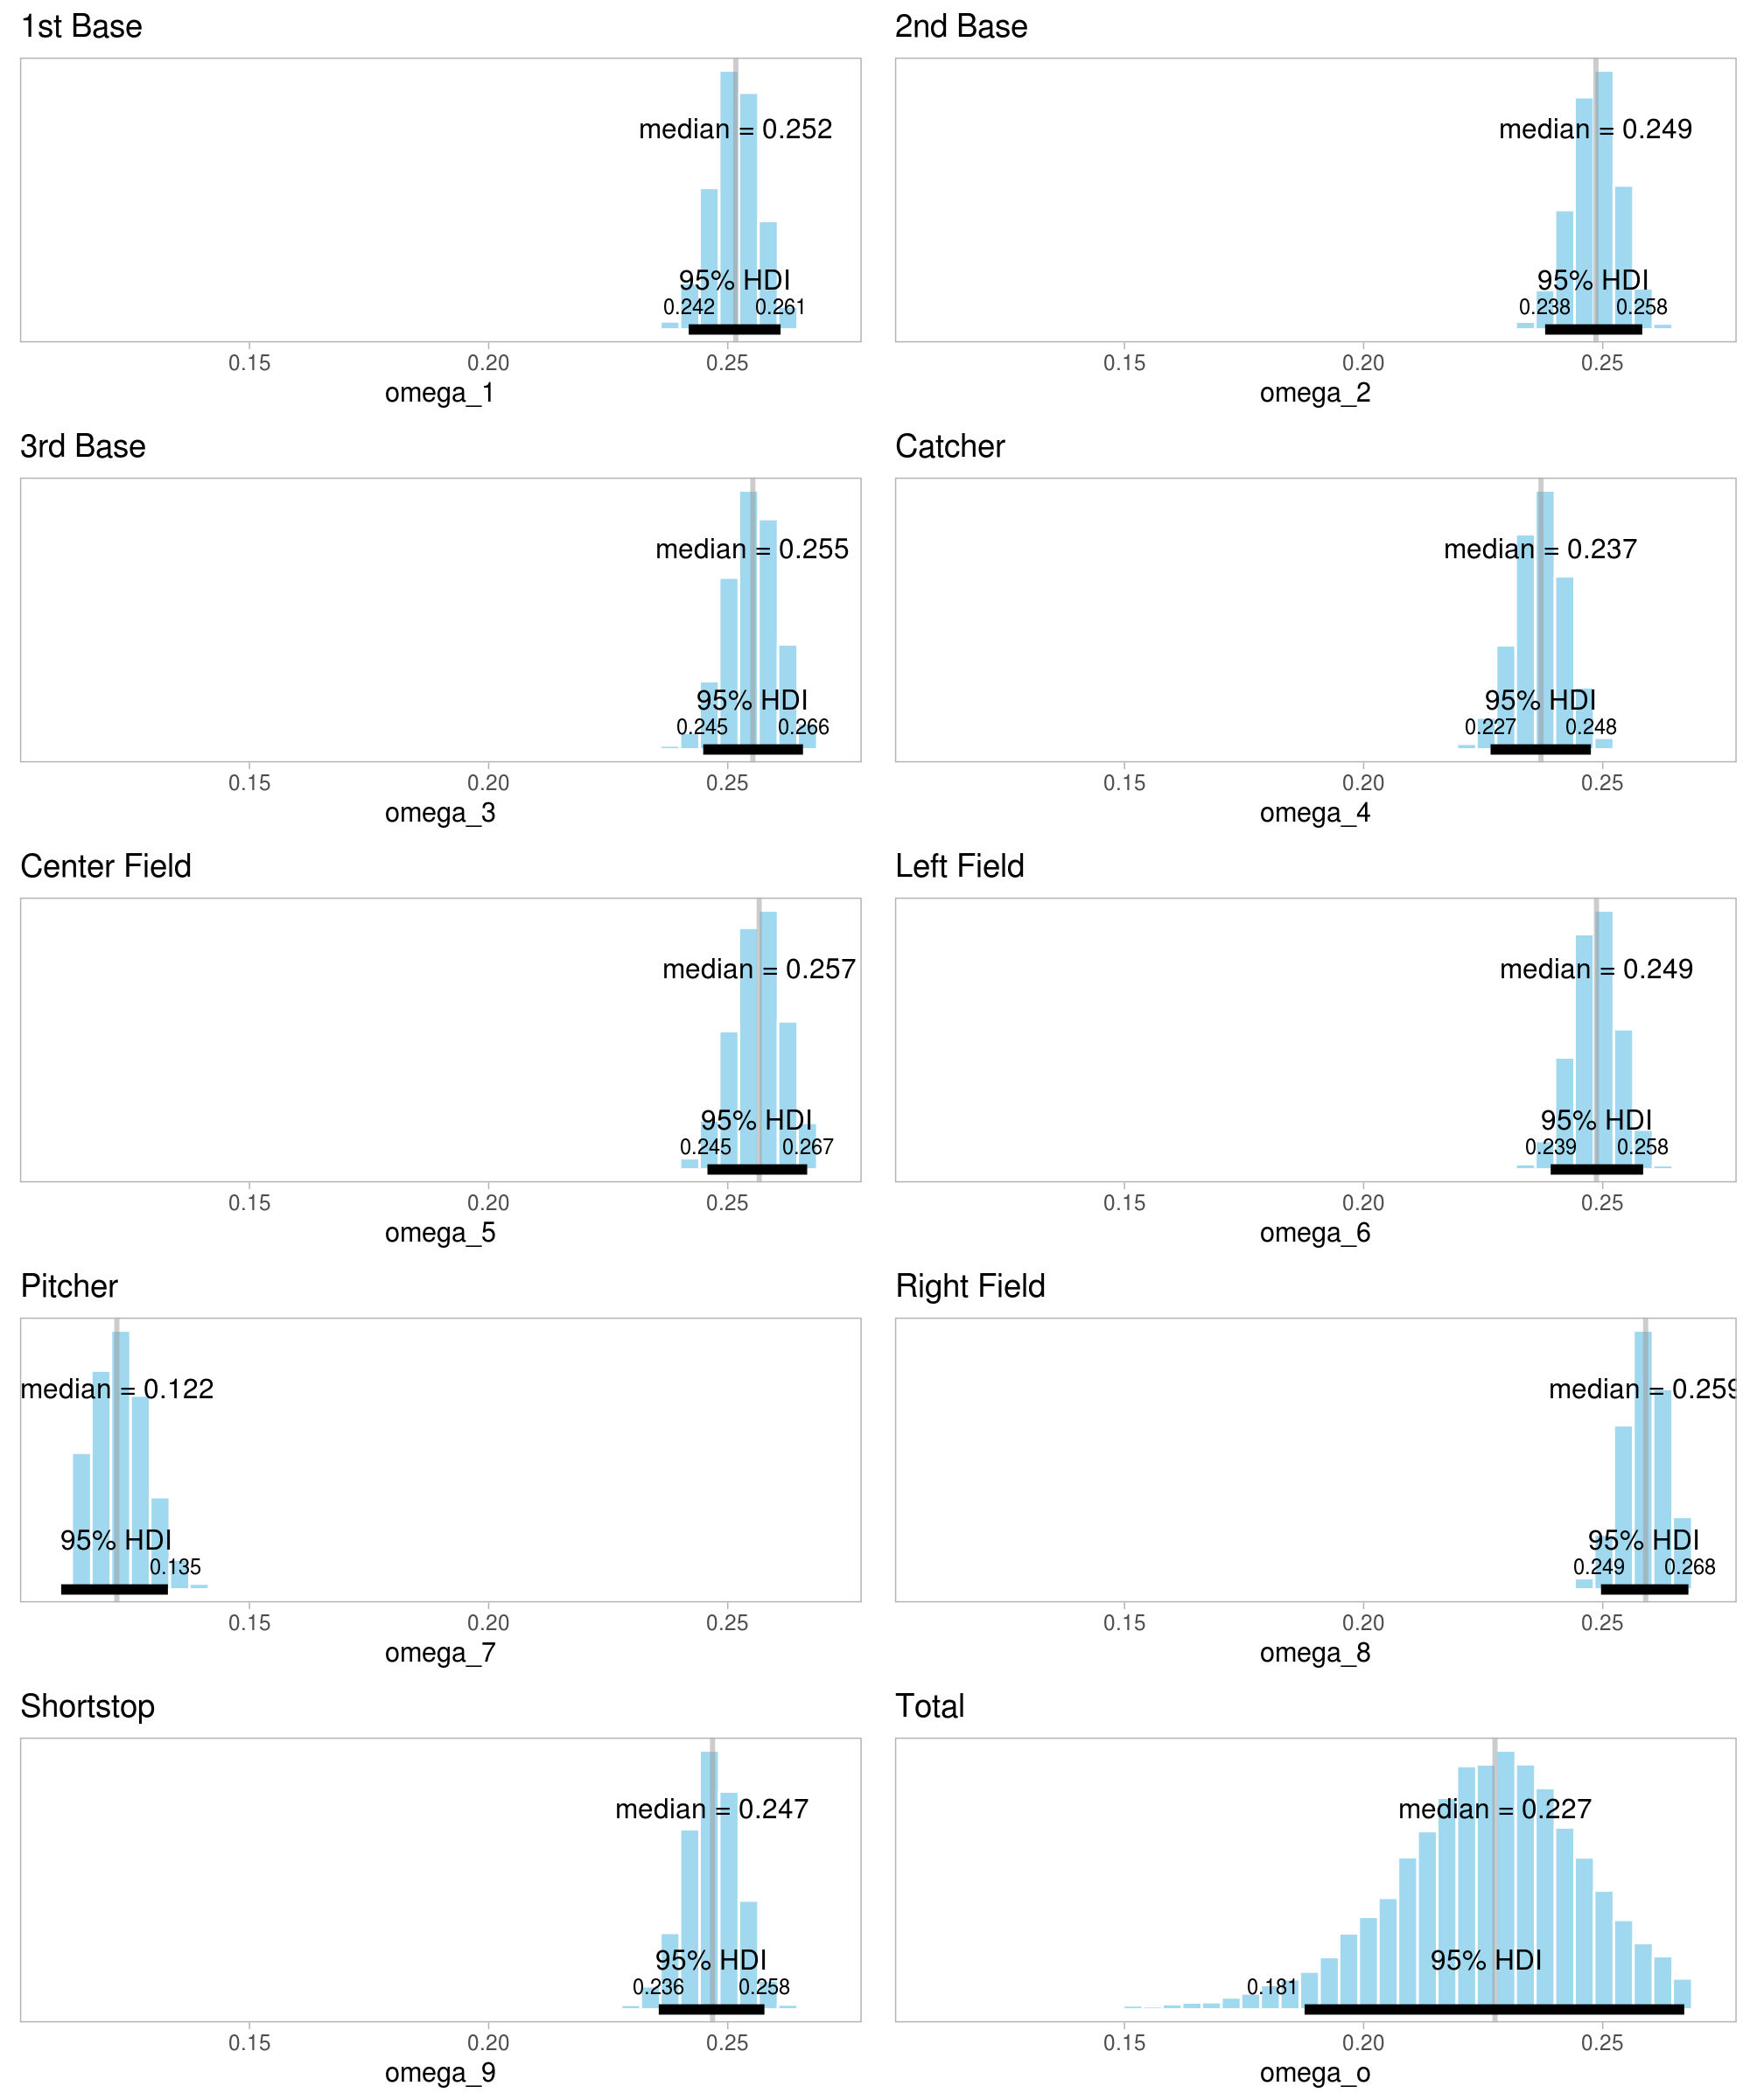

In [54]:
# posteria of position and total
set_plot_size(10, 12)
par_and_title <- c(map(1:NUM_POS, ~list(par = "omega_" %+% .x, title = id_to_pos(.x))), 
                   list(list(par = "omega_o", title = "Total")))
grid.arrange(
  grobs = map(par_and_title, ~plot_post(res, .x$par, title = .x$title, xlim = c(0.11, 0.27))), 
  ncol = 2, 
)